## Etapa 1: Instando o TensorFlow 2.0

In [ ]:
!jupyter notebook restart

[C 18:34:08.107 NotebookApp] No such file or directory: /content/restart


In [ ]:
!pip uninstall -y tensorflow #Comando necessário, pois o TensorFlow-gpu não desinstala a versão mais recente do Tensorflow, pode gerar conflitos.

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow-gpu==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
!pip show keras
!pip install keras

Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow, tensorflow-gpu


## Etapa 2: Importando as bibliotecas

In [ ]:
import cv2
import os
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt

#K.common.set_image_dim_ordering('th')

#%matplotlib inline

seed = 7
np.random.seed(seed)

#tf.__version__

## Etapa 3: Pré-processamento

### Carregando a base de dados MNIST

In [ ]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Pegando os dados de treino e teste do dataset

def load_data():

    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

    # Tornando os valores dos pixels entre 1. e 0.
    x_train = x_train / 255
    x_test = x_test / 255

    # Categorizando cada valor de label de acordo com um valor one hot.
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = load_data()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

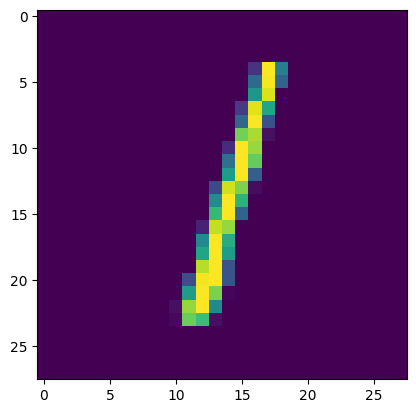

In [ ]:
plt.imshow(x_test[2])

## Etapa 4: Construindo a Rede Neural Convolucional

### Definindo o modelo

In [ ]:
#model = tf.keras.models.Sequential()
filename = 'modelo1.h5'

# pegando a quantidade de classes do dataset
num_classes = y_test.shape[1]

#Criando o modelo
model = Sequential()

### Adicionado a primeira camada de convolução

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (32, 32, 3)


In [ ]:
model.add(Conv2D(filters=30, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))

### Adicionando a camada de max-pooling e a segunda camada de convolução

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu


In [ ]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Conv2D(filters=15, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

### Adicionando a segunda camada de max-pooling

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

###  Adicionando uma camada de Dropout

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [ ]:
model.add(Dropout(0.2))

### Adicionando a camada de flattening

In [ ]:
model.add(Flatten())

### Adicionando três camadas densas (fully-connected)

Hyper-parâmetros da 1° camada densa:
- units/neurônios: 128
- função de ativação: relu

Hyper-parâmetros da 2° camada densa:
- units/neurônios: 64
- função de ativação: relu

Hyper-parâmetros da 3° camada densa:
- units/neurônios: 32
- função de ativação: relu

In [ ]:
model.add(Dense(units = 128, activation='relu'))

In [ ]:
model.add(Dense(units = 64, activation='relu'))

In [ ]:
model.add(Dense(units = 32, activation='relu'))

### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

 - units/neurônios: 10 (número de classes)
 - activation: softmax


In [ ]:
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

### Compilando o modelo

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [ ]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Treinando o modelo

In [ ]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1972 - accuracy: 0.9389
Epoch 2/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 3/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 4/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0438 - accuracy: 0.9868
Epoch 5/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0361 - accuracy: 0.9885
Epoch 6/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0343 - accuracy: 0.9897
Epoch 7/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 8/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0263 - accuracy: 0.9920
Epoch 9/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 47s 25m

### Avaliando o modelo

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0278 - accuracy: 0.9927


In [ ]:
print("Acurácia de Teste: {}".format(test_accuracy))
print("\nAcurácia em porcentagem: %.2f%%" % (test_accuracy*100))

Acurácia de Teste: 0.9926999807357788

Acurácia em porcentagem: 99.27%


In [ ]:
test_loss

0.7766072646141052